In [11]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
print(USB.__version__)

0.2.7


# Connecting to the board

In [4]:
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6) # init FTDI device 
fpga.reload() # reload configuration
fpga.reset() # reset fpga

# Checking transfer speed

Reading this section is optional, just used here to assess the SPI bus transfer speed.

In [28]:
acq_lines = 32
fpga.csr.nblines = acq_lines - 1
fpga.csr.drmode = 0
fpga.csr.acqstart = 1

while (not fpga.csr.acqdone):
    time.sleep(0.01)  
start = time.time()
acq_res = fpga.read_lines( acq_lines ) 
stop  = time.time()
duration = stop - start
duration

1.8281936645507812

In [29]:
NbPts = np.shape(acq_res)[0]*np.shape(acq_res)[1]
NbBytes = 2*NbPts
NbBytes

1048576

In [30]:
SpeedOfTransfers = NbBytes / duration / 1024
print("Speed: ",SpeedOfTransfers,"kB/s")

Speed:  560.1157141366718 kB/s


In [37]:
# acqs of 128us @ 1Msps on 8 bits
NbPtsCompressed = 128
MAXPRF = 1 / (NbPtsCompressed /  (NbBytes / duration))
print("F=",int(MAXPRF),"lines/sec - interline = ",int(1E6*1/MAXPRF),"us.")

F= 4480 lines/sec - interline =  223 us.


* __Results__
  * 4480 lines/sec, let's take 250us (ie 4 lines per sec). 
  * 128 us acqs. 
  * First Pt: 128, then counter.

# Setting the gain before the acquisition

Now we start ultrasonds =)

In [10]:
gain = [int(200 + ((500-200)*x*x*x/32/32/32)) for x in range(32)]
gain[0] = 0
gain[1] = 50
fpga.csr.dacgain = gain


# Running the actual acquisition

In [ ]:
file = fpga.stdNDTacq() # Running a standard NDT acquisition

# Previewing the first 50us of the signal at 128msps

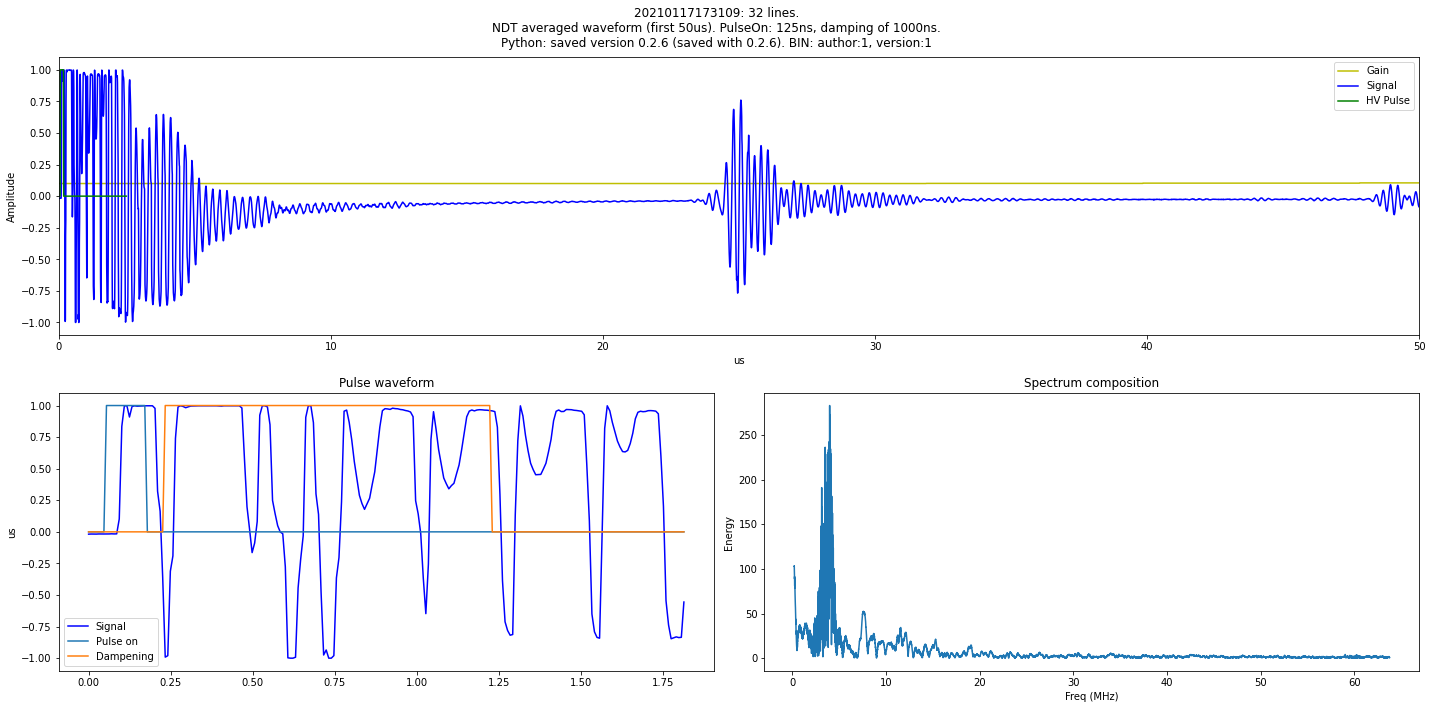

In [8]:
plot = USB.FView() # Opens a viewing object
data = plot.readfile(file) # plots it

# Getting the full signal

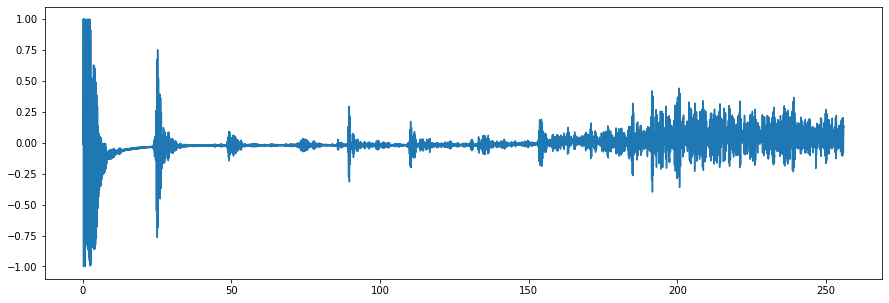

In [9]:
plt.figure(figsize=(15,5))
plt.plot(data["t"],data["signal"][2])

In [13]:
os.remove(file)

In [12]:
fpga.disconnect()